In [1]:
! pip install optbinning

In [1446]:
import pandas as pd 
import numpy as np 
import openpyxl
import itertools
import pandas as pd
from optbinning import OptimalBinning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from optbinning import OptimalBinning
import re
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import statsmodels.api as sm
import seaborn as sns


In [3]:
pd.set_option('display.max_rows', None)    # Show all rows
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_colwidth', None) 

In [677]:
from IPython.core.display import display, HTML

display(HTML("""<style>.container { width: 85% !important; }.code_cell .input_area {width: 100% !important;}.text_cell .input_area {width: 100% !important;}</style>"""))

C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3107909254.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Data Path

In [5]:
data_path = ".\Adobe\Candidate_Nov-11\Assessment_Data.xlsx"

In [6]:
# Load the Excel file
excel_file = pd.ExcelFile(data_path)

# Display all sheet names
sheet_names = excel_file.sheet_names
print("Sheet names:", sheet_names)

Sheet names: ['Data Dictionary', 'Fraud', 'NonFraud', 'Evaluation']


## Data Dictionary

In [7]:
df_dict = pd.read_excel(data_path, sheet_name="Data Dictionary")

In [8]:
new_cols = [x for x in str(df_dict.columns[0]).replace("'", "").replace(" ", "").split('|') if x]
df_dict.columns = ['temp']
expanded_df = df_dict['temp'].str.split('|', expand=True)
expanded_df = expanded_df.iloc[1:]
expanded_df = expanded_df.dropna(axis=1, how='all')
expanded_df = expanded_df.drop(columns=[expanded_df.columns[0], expanded_df.columns[-1]])
expanded_df.columns = new_cols
expanded_df['ColumnName'] = expanded_df['ColumnName'].str.replace(' ', '', regex=True)

In [9]:
display(expanded_df)

,ColumnName,DataType,Description
1,source_create_date,DATE,The date when the source data was created.
2,order_event_dates,ARRAY,List of dates when order events occurred.
3,final_fraud_event_date,DATE,The date of the final fraud event.
4,fiscal_yr_and_qtr_desc,STRING,Description of the fiscal year and quarter.
5,fiscal_yr_and_wk_desc,STRING,Description of the fiscal year and week.
6,user_created_date,DATE,The date when the user was created.
7,account_to_contract_date_diff,INT,Difference in days between account creation and contract date.
8,seat_status,STRING,"Status of the seat, encoded in MD5."
9,max_veda_cancel_date,DATE,The maximum VEDA cancel date.
10,order_cancel_date_diff,INT,Difference in days between order and cancel date.


In [10]:
expanded_df.head(10)

,ColumnName,DataType,Description
1,source_create_date,DATE,The date when the source data was created.
2,order_event_dates,ARRAY,List of dates when order events occurred.
3,final_fraud_event_date,DATE,The date of the final fraud event.
4,fiscal_yr_and_qtr_desc,STRING,Description of the fiscal year and quarter.
5,fiscal_yr_and_wk_desc,STRING,Description of the fiscal year and week.
6,user_created_date,DATE,The date when the user was created.
7,account_to_contract_date_diff,INT,Difference in days between account creation and contract date.
8,seat_status,STRING,"Status of the seat, encoded in MD5."
9,max_veda_cancel_date,DATE,The maximum VEDA cancel date.
10,order_cancel_date_diff,INT,Difference in days between order and cancel date.


## Fraud and non Fraud data

In [11]:
df_fraud = pd.read_excel(data_path, sheet_name="Fraud")

In [12]:
df_fraud.shape

(10000, 245)

In [13]:
df_nonfraud = pd.read_excel(data_path, sheet_name="NonFraud")

In [14]:
df_nonfraud.shape

(30200, 245)

In [15]:
df_fraud['final_fraud_event_date'].describe()

count                            10000
mean     2024-07-02 04:46:24.960000256
min                2024-02-03 00:00:00
25%                2024-05-27 00:00:00
50%                2024-06-06 00:00:00
75%                2024-08-17 00:00:00
max                2024-10-25 00:00:00
Name: final_fraud_event_date, dtype: object

In [16]:
df_nonfraud['final_fraud_event_date'].describe()

count                            30200
mean     2024-09-01 12:30:28.132450560
min                2024-08-01 00:00:00
25%                2024-08-19 00:00:00
50%                2024-09-03 00:00:00
75%                2024-09-17 00:00:00
max                2024-09-30 00:00:00
Name: final_fraud_event_date, dtype: object

In [17]:
df_fraud['fiscal_yr_and_qtr_desc'].value_counts(dropna=False)

fiscal_yr_and_qtr_desc
2024-Q3    4454
2024-Q2    3763
2024-Q4    1779
2024-Q1       4
Name: count, dtype: int64

In [18]:
df_nonfraud['fiscal_yr_and_qtr_desc'].value_counts(dropna=False)

fiscal_yr_and_qtr_desc
2024-Q4    16613
2024-Q3    13587
Name: count, dtype: int64

## Out of time Evaluation Data

In [19]:
df_eval = pd.read_excel(data_path, sheet_name="Evaluation")

In [20]:
df_eval.shape

(60300, 245)

In [1401]:
print([x for x in df_eval.columns if 'fraud' in x.lower()])

['final_fraud_event_date', 'fraud_cancel_date', 'fraud_cancel_scenario', 'migrated_fraud_contract', 'migrated_fraud_delegate', 'fraud_cancels_on_invoice_domain_count', 'pct_fraud_cancel_vs_successful_by_domain', 'fraud_cancels_on_invoice_ip_count', 'pct_fraud_cancel_vs_successful_by_ip', 'bin_pct_fraud_users', 'bin_fraud_cancels', 'fraud']


In [1400]:
df_eval['fraud'].value_counts(dropna=False)

fraud
-1    60300
Name: count, dtype: int64

In [21]:
df_eval['final_fraud_event_date'].describe()

count                            60300
mean     2024-06-25 06:25:50.328358144
min                2022-01-12 00:00:00
25%                2024-04-24 00:00:00
50%                2024-06-12 00:00:00
75%                2024-09-22 00:00:00
max                2024-11-07 00:00:00
Name: final_fraud_event_date, dtype: object

In [22]:
df_eval['fiscal_yr_and_qtr_desc'].value_counts(dropna=False)

fiscal_yr_and_qtr_desc
2024-Q2    21631
2024-Q3    17231
2024-Q4    16787
2024-Q1     4517
2023-Q4       31
2023-Q3       25
2023-Q2       22
2023-Q1       15
2022-Q3       15
2022-Q2       12
2022-Q1        8
2022-Q4        6
Name: count, dtype: int64

## Keep copy avoid loading slow

In [255]:
df_fraud_copy = df_fraud.copy()
df_nonfraud_copy = df_nonfraud.copy()
df_eval_copy = df_eval.copy()

In [256]:
print([x for x in df_eval_copy.columns])

['source_create_date', 'order_event_dates', 'final_fraud_event_date', 'fiscal_yr_and_qtr_desc', 'fiscal_yr_and_wk_desc', 'user_created_date', 'account_to_contract_date_diff', 'seat_status', 'max_veda_cancel_date', 'order_cancel_date_diff', 'fraud_cancel_date', 'fraud_cancel_scenario', 'migrated_fraud_contract', 'subscription_type', 'phone_vs_web', 'jem_contract_id', 'subscription_account_guid', 'sales_document', 'dylan_order_number', 'dist_orders_by_guid', 'enrollee_id', 'email', 'emails', 'distinct_emails_per_guid', 'min_primary_email_change_dt', 'primary_email_change_to_contract_date_diff', 'user_full_name', 'first_names', 'last_names', 'org_name', 'sales_district', 'predom_usage_country', 'predom_country_sales_district_match', 'last_login_country_codes', 'last_login_ip_addresses', 'max_arkose_ip_country', 'max_arkose_ip_sales_district_match', 'arkose_ip_connection_types', 'arkose_ip_vpn', 'arkose_ip_tor', 'arkose_ip_bot', 'app_usage_last_90days_flag', 'most_used_app_last_90days', 's

In [257]:
df_fraud_copy.shape, df_nonfraud_copy.shape, df_eval_copy.shape

((10000, 246), (30200, 246), (60300, 246))

In [258]:
bin_combined = pd.read_csv('bin_combined.csv')

In [259]:
bin_combined.head()

,feature,original_bin,feature_bin,average_target_rate
0,fraud_cancel_scenario,"[""Missing""]",fraud_cancel_scenario_missing,0.000000
1,fraud_cancel_scenario,"[""DCB0461300C85F31964B6AB9D2CDB1A1"", ""7C2F6FD358F6AAE240CC5BE70AE67B7C"", ""F552E142CBED032B812B659E51A20EFC"", ""6D38F64A3499C85D31074CC83E5AFE5C"", ""EB0390CF1B0F3FD4B9781FA1F80F7622"", ""E028166A0735FD584604657F62A139D6"", ""4DD169C6439FC3A753BE33DA51D16ABB"", ""1792E5B553847A6E3C5277DEBD49D0B7"", ""C8EB03F7F9950B6E754A13D0629E372E"", ""E1A51DB1DBA9EE03DE017EFF11ABB6B3"", ""ADADBB1AF7F8190B39951293E2D9E38A"", ""E5C164C3E3CEC58B27645BDB0FC26B82""]",fraud_cancel_scenario_0,0.193977
2,fraud_cancel_scenario,"[""936B49A398BD1CC633CE66A1B84F8B90"", ""9F0518672EF9CD3CC1B80AF44F7FB861"", ""504BE4CEA976B3D913F530716ADF4379"", ""19FEE3E2DBECFF3C74285242323B632A"", ""CB8B162CE5F85475DF1B8026B3E3AF49"", ""54CFF570ADC793B33D898E62A0131D18"", ""589491D630B3D2558498DD0B972D3473""]",fraud_cancel_scenario_1,0.227354
3,fraud_cancel_scenario,"[""8608475FDAC1CBF6D77796A7D25C87DC"", ""3DCA758D68B99ACF20C94E7C221A4E51"", ""2CBA608102A3BEB3D1FCB06133DFC4E6"", ""EB700F5D39E437F91E3D9FE45555228F"", ""F68B8E98C70A52BAC86303B57FBAB9E8"", ""34065F38B8BD66D21493712B348A1EF3"", ""2EB515911585F5B4E9F34ECFC90ECE83"", ""AB78909A179407732C87C8625D6EC886"", ""A97B08FCEC55634C0BDA9CEA3E6CA439"", ""387080815C2167157206EC6F30049984"", ""53A28DD7181881DD9C5A24B902E32C92"", ""41C6FD998F4EF83E785E88F1B43E9336"", ""6F350905D308C07CA38128D785F96DFA"", ""D229D1469740F47D49604B3F9D68C884"", ""A767632AB16EF7F110517343CD04E3D4""]",fraud_cancel_scenario_2,0.346652
4,fraud_cancel_scenario,"[""BF5315BB67EB6C58F57D7ADA8399A2DD"", ""54D47544C8630680AE4EFD91A48CF1A8"", ""78D1B0810619D5E84441B2AA66AEE915"", ""0E924C8F33A673517C3096BAA9A983D1"", ""99CCB8D40AA7377C6040021E880B15B7"", ""C5765C1B2E95C45720378D8F5E8A6804"", ""BFB341F188B6D38730BD330AF16AFBB1"", ""CC99251803B6512F077AFF87BA35473C"", ""D51201AD2717D0357B9437AE88C823C2"", ""D73733D2FBB5E6D1010F3EFE78FE6D79"", ""DCF6CB70F394159F4DD172B36CEC0ED7"", ""EEC3A0B35FC8EC49C7FB94A56E8F1715"", ""BB4D103145CD001E60E9C1B07868DF78"", ""8B6AC82E9BF92BF179585AD8FC1E638E"", ""AFD54A2960BD10E2B2E91AF49438563C"", ""210F1F201A1E199118F7A590B28859FB"", ""25EDD3282B7AE21C46168E0555979D88"", ""2CECB3ED200E7E107DB0B3266EBC8C81"", ""31257B5731E23620621331E495C43AA9"", ""32D50269EFB4742BF8442C8B1441702E"", ""4131C7BFAA69B33A39E77FFE7C86FE66"", ""441E4779CDA58EA04B44B01A9B1BCBD5"", ""5248AF4C84C94FAEF7009467DD08E5C6"", ""B2871E04B4F17C6CB878F828624D3A73"", ""604ACE803C2913E03F399DE0BA0F9DB2"", ""62DE5868ECE99387697F994CE4B33A29"", ""66E21F9BA05F83E471B027A1F0E8A851"", ""72CC58142CEF2DC7024DC11D273D44E3"", ""87A3C1AADF1BB1E1FD9A7014B5340399"", ""8ED06C6E4031445988A3BC7EB9C15883"", ""99E23611B730DB4BA97B57EBF05237DF"", ""9B2E78AE5BBC552C70A095CA5956698C"", ""9D608868B0C6976941804DE369D405F4"", ""62945900A00D20C04DF125D6B9FD35ED"", ""FB989CCB2AB49F1194D3D93D325D9B77""]",fraud_cancel_scenario_3,0.997316


In [260]:
print(bin_combined['feature'].nunique())

66


In [482]:
# bin_combined.loc[bin_combined['feature']=='invoice_items_sku']

In [261]:
def clean_field(string_value):

    if pd.isna(string_value):  # Handle missing values
        return string_value
    # Step 1: Remove newline characters and single quotes
    cleaned_string = string_value.replace('\n', ' ').replace("'", "").replace("[]", "")
    
    # Step 2: Split based on whitespace to get individual elements
#     elements = re.split(r'\s+', cleaned_string)
    
    return cleaned_string

In [262]:
def clean_field_2(string_value):

    if pd.isna(string_value):  # Handle missing values
        return string_value
    # Step 1: Remove newline characters and single quotes
    cleaned_string = string_value.replace('\n', ' ').replace('"', "").replace("[", "").replace("]", "").replace("'", "")
#     cleaned_string = float(cleaned_string)
    # Step 2: Split based on whitespace to get individual elements
#     elements = re.split(r'\s+', cleaned_string)
    
    return cleaned_string

In [263]:
def assign_category(value, mapping_dict):
    # Ensure value is a string before checking for membership
    if isinstance(value, str):
        for key_elements, category in mapping_dict.items():
            if value in key_elements:
                return category
    return 'Missing_Other'  # Default category if no match is found or if value is not a string


In [264]:
def dictionary_clean(data_path):
    df_dict = pd.read_excel(data_path, sheet_name="Data Dictionary")
    new_cols = [x for x in str(df_dict.columns[0]).replace("'", "").replace(" ", "").split('|') if x]
    df_dict.columns = ['temp']
    expanded_df = df_dict['temp'].str.split('|', expand=True)
    expanded_df = expanded_df.iloc[1:]
    expanded_df = expanded_df.dropna(axis=1, how='all')
    expanded_df = expanded_df.drop(columns=[expanded_df.columns[0], expanded_df.columns[-1]])
    expanded_df.columns = new_cols
    expanded_df['ColumnName'] = expanded_df['ColumnName'].str.replace(' ', '', regex=True)

    expanded_df = expanded_df.loc[expanded_df['ColumnName']!='school_name_status_and_overall_users_on_school_ct']
    expanded_df['DataType'] = expanded_df['DataType'].str.replace(r'[^A-Za-z]', '', regex=True)
    
    return expanded_df

In [265]:
def feature_transformation_01(df, target,  expanded_df, bin_definitions):
    
    features_keep = [target]
    
    ########################################################################################################################
    ## Int, Decimal, Bool NOT do any transformation at this stage, we may consider further transform later stage 
    int_cols = expanded_df.loc[expanded_df['DataType']=='INT', 'ColumnName'].tolist()
    dec_cols = expanded_df.loc[expanded_df['DataType']=='DECIMAL', 'ColumnName'].tolist()
    bool_cols = expanded_df.loc[expanded_df['DataType']=='BOOLEAN', 'ColumnName'].tolist()
    num_cols = int_cols+dec_cols+bool_cols
    

    print(f'# Int columns: {len(int_cols)}')
    print(f'# Decimal columns: {len(dec_cols)}')
    print(f'# Bool columns: {len(bool_cols)}')
    print(f'# All Numerical columns: {len(num_cols)}')
    print(f"# Features for binning is {bin_definitions['feature'].nunique()}")
    
    features_keep = features_keep+num_cols

    ########################################################################################################################
    ## String/Array Bins
    for feature_name in bin_definitions['feature'].unique():
        
        df[feature_name] = df[feature_name].apply(lambda x: clean_field(x))
        # Filter the bin definitions for the current feature
        feature_bins = bin_definitions[bin_definitions['feature'] == feature_name]
        # Create a dictionary to map original values to renamed bins
        bin_dict = dict(zip(feature_bins['original_bin'], feature_bins['feature_bin']))
        df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
    
    binned_str_list = [ x for x in df.columns if 'Adobe_bin_' in x]
    
    features_keep += binned_str_list
    ########################################################################################################################
    ## High Cardinality Bins string type, ---> create missing or not
    
    string_cols = expanded_df.loc[expanded_df['DataType']=='STRING', 'ColumnName'].tolist()

#     cardinality_threshold_high = 500
#     high_cardinality_features = [col for col in string_cols if df.loc[df[target]!=-1, col].nunique() > cardinality_threshold_high]

#     # Display the high cardinality features
#     print(f"Features with cardinality > {cardinality_threshold_high}:")
#     print(high_cardinality_features)

    high_cardinality_features = ['jem_contract_id', 'subscription_account_guid', 'sales_document', 'dylan_order_number', 'enrollee_id', 'email', 
                                 'user_full_name', 'org_name', 'credit_card_bin', 'credit_card_short_number', 'credit_card_span', 'issuer_bank_name', 
                                 'account_holder_name', 'invoice_shipping_email', 'invoice_shipping_email_domain', 'invoice_ip_address',
                                 'invoice_pi_vat_id', 'msdfp_BrowserUserAgent', 'msdfp_Carrier', 'msdfp_DeviceId', 'postalcode', 'phonenumber', 
                                 'address_line1', 'rejected_order_event_dates', 'rejected_cc_spans', 'rejected_account_holder_names', 'cs_cases',
                                 'downloaded_apps', 'used_apps', 'arkose_evaluated_email']
    
    for a in high_cardinality_features:
        df[f'missing_{a}'] = df[a].isna().astype(int)

    missing_high_cardinality_features = [f'missing_{a}' for a in high_cardinality_features]    
    features_keep += missing_high_cardinality_features
    ########################################################################################################################
    ## Time Difference
    date_cols = expanded_df.loc[expanded_df['DataType'].isin(['DATE']), 'ColumnName'].tolist()
#     ts_cols = expanded_df.loc[expanded_df['DataType'].isin(['TIMESTAMP']), 'ColumnName'].tolist()
#     ts_cols = [x for x in ts_cols if x != 'latest_transaction_ts']

#     date_ts_cols = date_cols + ts_cols
    
# # df.loc[df[target]!=-1, date_ts_cols]
# #     missing_percentage = df[date_ts_cols].isnull().mean().sort_values(ascending=False)
#     missing_percentage = df.loc[df[target]!=-1, date_ts_cols].isnull().mean().sort_values(ascending=False)

#     date_ts_cols = [x for x in date_ts_cols if x not in missing_percentage[missing_percentage>0.96].index.tolist()]
    
    
#     date_ts_cols = [x for x in date_ts_cols if x!='source_create_date']
    date_ts_cols = ['final_fraud_event_date', 'user_created_date','max_veda_cancel_date','fraud_cancel_date','min_primary_email_change_dt',
                    'card_expiry_date','domain_first_seen_internal','domain_last_seen_internal','bin_max_transaction_date','bill_plan_end_date',
                    'min_cs_case_date','charge_back_date','min_stock_download_date','max_stock_download_date','min_ff_usage_date',
                    'max_ff_usage_date','latest_auth_ts','min_sign_participation_ts','max_sign_participation_ts']
    print(f'# ts in loop: {len(date_ts_cols)}')

    pairs = itertools.combinations(date_ts_cols, 2)
    # Calculate the day difference for each pair and create new columns
    for col1, col2 in pairs:
        df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
    delta_time_cols = [x for x in df.columns if 'adobe_diff_days_' in x.lower()]
    
    features_keep += delta_time_cols
    
    ########################################################################################################################
    ## Special changes
    
    df['latest_transaction_amount'] = df['latest_transaction_amount'].apply(lambda x: clean_field_2(x))
    df['latest_transaction_amount'] = pd.to_numeric(df['latest_transaction_amount'], errors='coerce')
    df['latest_transaction_amount'] = df['latest_transaction_amount'].fillna(-999).astype(int)  # or use .dropna() before converting to int

    ########################################################################################################################
    print(f'# features to generate: {len(features_keep)}')
    return df[features_keep]

In [266]:
# bin_mapping

In [267]:
target = 'fraud'

In [268]:
df_fraud = df_fraud_copy.copy()
df_nonfraud = df_nonfraud_copy.copy()
df_eval = df_eval_copy.copy()
df_fraud[target] = 1
df_nonfraud[target] = 0
df_eval[target] = -1

In [269]:
df_generate = pd.concat([df_fraud, df_nonfraud, df_eval], axis=0)

In [270]:
df_generate.shape

(100500, 246)

In [271]:
df_generate[target].value_counts(dropna=False)

fraud
-1    60300
 0    30200
 1    10000
Name: count, dtype: int64

## Feature Generations

In [272]:
data_dictionary = dictionary_clean(data_path)

In [273]:
data_dictionary.shape

(245, 3)

In [274]:
data_dictionary.shape, bin_combined.shape

((245, 3), (262, 4))

In [275]:
df_generate =  feature_transformation_01(df_generate, target,  data_dictionary, bin_combined)

# Int columns: 80
# Decimal columns: 11
# Bool columns: 21
# All Numerical columns: 112
# Features for binning is 66


C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly frag

C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly frag

C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly frag

C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:30: PerformanceWarning: DataFrame is highly frag

C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'missing_{a}'] = df[a].isna().astype(int)
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'missing_{a}'] = df[a].isna().astype(int)
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

# ts in loop: 19


C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragment

C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragment

C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragment

C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3805020540.py:84: PerformanceWarning: DataFrame is highly fragment

# features to generate: 380


In [276]:
# print([x for x in df_generate.columns])

In [277]:
df_generate.shape

(100500, 380)

In [278]:
# df_generate['Adobe_diff_days_final_fraud_event_date_user_created_date'].describe()

## Feature Selection 

In [279]:
features = [x for x in df_generate.columns if x != target]
len(features)

379

In [280]:
df_generate.loc[df_generate[target]!=-1, features].dtypes.value_counts(dropna=False)

float64    258
object      73
int32       31
int64       15
bool         2
Name: count, dtype: int64

In [281]:
cols_numeric = df_generate[features].select_dtypes(include=['float', 'int', 'bool']).columns.tolist()
len(cols_numeric)

306

In [282]:
cols_binned = df_generate[features].select_dtypes(include=['object']).columns.tolist()
len(cols_binned)

73

In [536]:
df = df_generate.copy()

## Missing values

In [537]:
def missing_imputation(df) : 
    cols_numeric = df.select_dtypes(include=['float', 'int', 'bool']).columns.tolist()
    df[cols_numeric] = df[cols_numeric].fillna(-9999999)
    cols_binned = df.select_dtypes(include=['object']).columns.tolist()
    df[cols_binned] = df[cols_binned].fillna('-9999999')
    
    return df

In [538]:
df = missing_imputation(df)

In [539]:
# df['Adobe_bin_fiscal_yr_and_wk_desc'].value_counts(dropna=False)

## Using Development Data (not Evaluation Data) for variable selections

In [540]:
X = df.loc[df[target]!=-1].drop(target, axis=1)
y = df.loc[df[target]!=-1, target]

## 1. Numerical Variables search, Lasso

In [541]:
# Create a pipeline with scaling and LassoCV for automatic alpha selection
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Standardize features
    ('lasso', LassoCV(cv=5, random_state=0))  # Use cross-validation to find the best alpha
])

# Fit the pipeline
pipeline.fit(X[cols_numeric], y)

# Get the coefficients from the Lasso model
lasso = pipeline.named_steps['lasso']
feature_importances = pd.DataFrame({
    'Feature': X[cols_numeric].columns,
    'Coefficient': lasso.coef_
})

# Select the most important features (non-zero coefficients)
important_features = feature_importances[feature_importances['Coefficient'] != 0]

# Display the important features
print("Most Important Features:")
print(important_features)

C:\Users\itsht\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19451829937679577, tolerance: 0.18405472636815898
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\itsht\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4349771572797181, tolerance: 0.18405472636815898
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\itsht\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45625629595633654, tolerance: 0.18405472636815898
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\itsht\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent

Most Important Features:
                                                                   Feature  \
4                               primary_email_change_to_contract_date_diff   
5                                                   invoice_items_quantity   
6                                                                 seat_sum   
7                                                          cct_delegate_ct   
8                                                   cct_delegate_domain_ct   
9                                                  cct_delegate_country_ct   
10                                         disposable_delegate_email_count   
13                                 domain_first_seen_to_contract_date_diff   
15                                             domain_age_in_days_internal   
16                                             invoice_email_prefix_length   
17                             invoice_email_prefix_max_consec_cons_length   
18                                     

C:\Users\itsht\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.692e+01, tolerance: 7.512e-01
  model = cd_fast.enet_coordinate_descent(


In [542]:
top_20_features = feature_importances.reindex(feature_importances['Coefficient'].abs().sort_values(ascending=False).index).head(20)

In [543]:
top_20_features['Varimp_Lasso_ABS'] = top_20_features['Coefficient'].abs()

In [544]:
top_20_features

,Feature,Coefficient,Varimp_Lasso_ABS
15,domain_age_in_days_internal,0.943572,0.943572
140,Adobe_diff_days_final_fraud_event_date_domain_first_seen_internal,0.939643,0.939643
30,rejected_orders_on_invoice_domain_ct_alltime,0.175670,0.175670
137,Adobe_diff_days_final_fraud_event_date_fraud_cancel_date,0.138698,0.138698
25,users_on_invoice_domain_ct_alltime,-0.101783,0.101783
10,disposable_delegate_email_count,-0.074387,0.074387
34,orders_on_invoice_ip_ct_48h,-0.073112,0.073112
13,domain_first_seen_to_contract_date_diff,-0.050262,0.050262
141,Adobe_diff_days_final_fraud_event_date_domain_last_seen_internal,0.047941,0.047941
190,Adobe_diff_days_fraud_cancel_date_bin_max_transaction_date,0.046411,0.046411


In [545]:
top_20_features_lasso = top_20_features.sort_values(by='Varimp_Lasso_ABS', ascending=True)

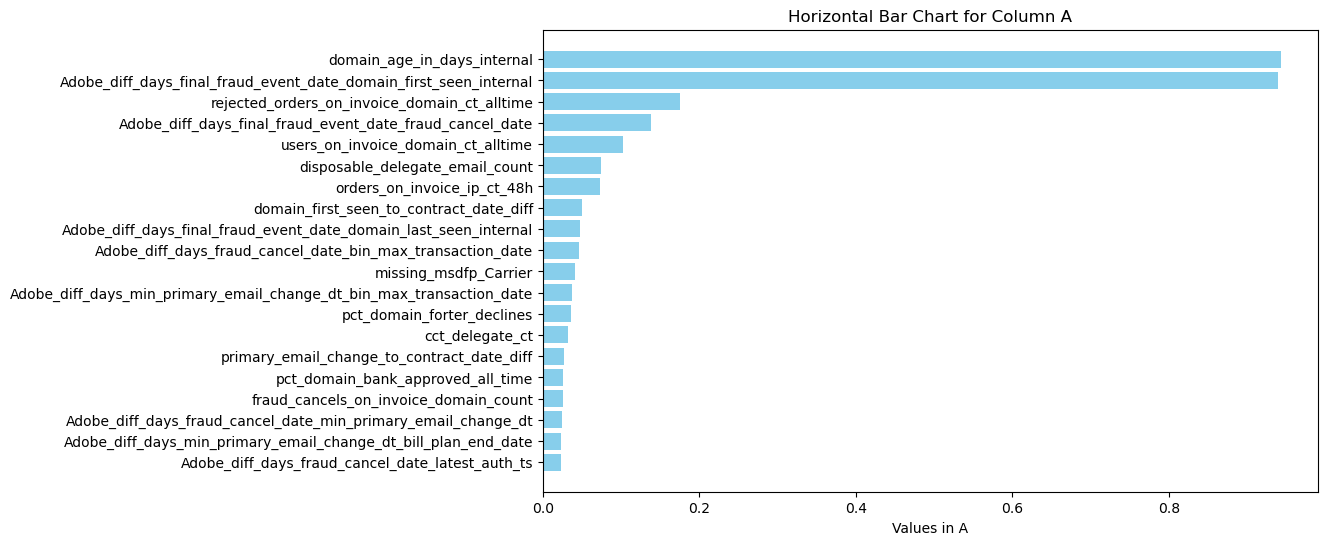

In [546]:
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_20_features_lasso['Feature'], top_20_features_lasso['Varimp_Lasso_ABS'], color='skyblue')  # Use df['Category'] for the y-axis labels
plt.xlabel('Values in A')
plt.title('Horizontal Bar Chart for Column A')
plt.show()

## 2. Numerical Variables search, GBM

In [547]:
# Convert to DataFrame
df = pd.DataFrame(X[cols_numeric], columns=feature_names)
df['target'] = y

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Initialize and fit the GBM model
model = GradientBoostingClassifier(random_state=0)
model.fit(X[cols_numeric], y)

# Retrieve and sort feature importances
feature_importances = pd.DataFrame({
    'Feature': X[cols_numeric].columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)


C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\1023479269.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['target'] = y


In [548]:
top_20_features_gbm

,Feature,Importance
142,Adobe_diff_days_final_fraud_event_date_bin_max_transaction_date,0.732037
189,Adobe_diff_days_fraud_cancel_date_domain_last_seen_internal,0.095582
188,Adobe_diff_days_fraud_cancel_date_domain_first_seen_internal,0.070981
82,pct_domain_bank_approved_all_time,0.031270
13,domain_first_seen_to_contract_date_diff,0.018054
85,pct_fraud_cancel_vs_successful_by_domain,0.012314
248,Adobe_diff_days_domain_last_seen_internal_latest_auth_ts,0.005101
10,disposable_delegate_email_count,0.004205
140,Adobe_diff_days_final_fraud_event_date_domain_first_seen_internal,0.003579
251,Adobe_diff_days_bin_max_transaction_date_bill_plan_end_date,0.003130


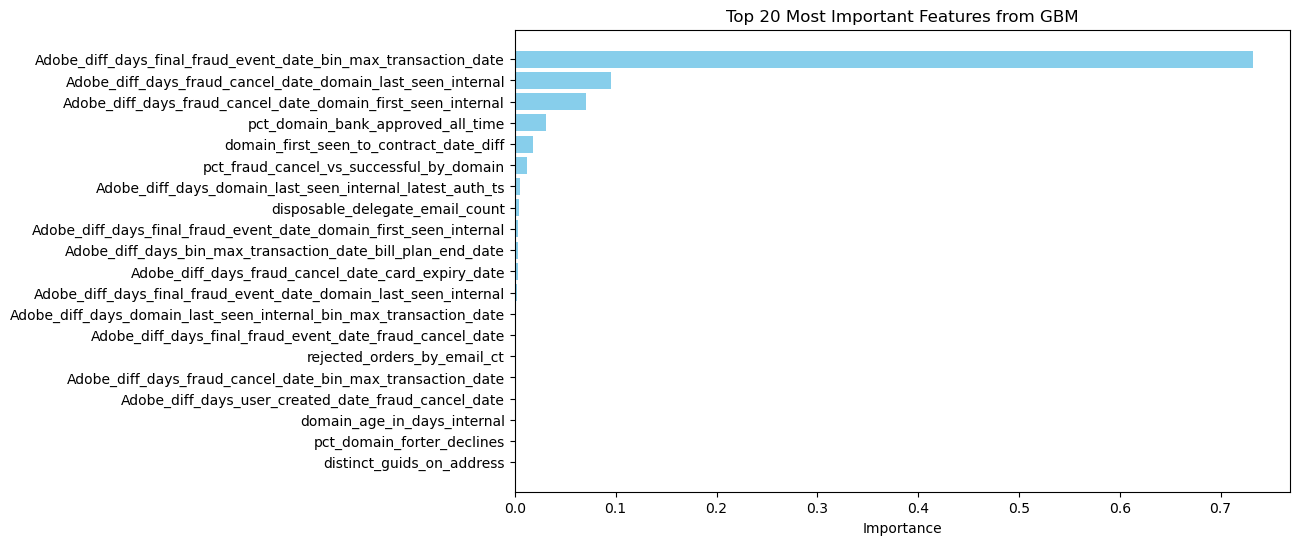

In [549]:
# Display the top 10 most important features
top_20_features_gbm = feature_importances.head(20)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(top_20_features_gbm['Feature'], top_20_features_gbm['Importance'], color="skyblue")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel('Importance')
plt.title('Top 20 Most Important Features from GBM')
plt.show()

In [550]:
top_20_features_lasso['Feature'].tolist()

['Adobe_diff_days_fraud_cancel_date_latest_auth_ts',
 'Adobe_diff_days_min_primary_email_change_dt_bill_plan_end_date',
 'Adobe_diff_days_fraud_cancel_date_min_primary_email_change_dt',
 'fraud_cancels_on_invoice_domain_count',
 'pct_domain_bank_approved_all_time',
 'primary_email_change_to_contract_date_diff',
 'cct_delegate_ct',
 'pct_domain_forter_declines',
 'Adobe_diff_days_min_primary_email_change_dt_bin_max_transaction_date',
 'missing_msdfp_Carrier',
 'Adobe_diff_days_fraud_cancel_date_bin_max_transaction_date',
 'Adobe_diff_days_final_fraud_event_date_domain_last_seen_internal',
 'domain_first_seen_to_contract_date_diff',
 'orders_on_invoice_ip_ct_48h',
 'disposable_delegate_email_count',
 'users_on_invoice_domain_ct_alltime',
 'Adobe_diff_days_final_fraud_event_date_fraud_cancel_date',
 'rejected_orders_on_invoice_domain_ct_alltime',
 'Adobe_diff_days_final_fraud_event_date_domain_first_seen_internal',
 'domain_age_in_days_internal']

In [551]:
numerical_keep = list(set( top_20_features_gbm.iloc[:10]['Feature'].tolist()+ top_20_features_lasso.iloc[:10]['Feature'].tolist()))
len(numerical_keep)

19

## Refresh data

In [557]:
df = df_generate.copy()
df = missing_imputation(df)

In [558]:
X = df.loc[df[target]!=-1].drop(target, axis=1)
y = df.loc[df[target]!=-1, target]

In [559]:
X[cols_binned].shape, y.shape

((40200, 71), (40200,))

In [560]:
print([x for x in cols_binned])

['migrated_fraud_contract', 'app_usage_last_90days_flag', 'migrated_fraud_delegate', 'is_adobe_employee_email', 'invoice_email_bounced', 'invoice_email_verified', 'egp_credit_or_cancel_flag', 'Adobe_bin_fraud_cancel_scenario', 'Adobe_bin_last_login_country_codes', 'Adobe_bin_last_login_ip_addresses', 'Adobe_bin_cct_delegate_domains', 'Adobe_bin_cct_delegate_countries', 'Adobe_bin_cct_delegate_usage_countries', 'Adobe_bin_disposable_delegate_domains', 'Adobe_bin_high_risk_delegate_email_domains', 'Adobe_bin_promo_type', 'Adobe_bin_product_names_desc', 'Adobe_bin_product_list', 'Adobe_bin_market_segment', 'Adobe_bin_latest_attempt_types', 'Adobe_bin_latest_auth_type', 'Adobe_bin_latest_purchase_instance', 'Adobe_bin_latest_auth_status', 'Adobe_bin_latest_auth_decision', 'Adobe_bin_latest_transaction_currency', 'Adobe_bin_with_cvv', 'Adobe_bin_payment_vendors', 'Adobe_bin_msdfp_BrowserUserAgentLanguages', 'Adobe_bin_preferred_user_languages', 'Adobe_bin_surfaces', 'Adobe_bin_surface_rollu

In [564]:
cols_binned = [x for x in cols_binned if x!='Adobe_bin_fiscal_yr_and_wk_desc'] 
cols_binned = [x for x in cols_binned if x!='Adobe_bin_invoice_items_sku']  
cols_binned = [x for x in cols_binned if x!='Adobe_bin_seat_status']  

In [565]:
# Encode categorical features and target variable
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':  # Only encode categorical columns
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Separate features and target
X = df.drop(target, axis=1)
y = df[target]

# Apply Chi-Square test for feature selection
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X[cols_binned], y)

# Create a DataFrame with feature names and Chi-Square scores
chi2_scores = pd.DataFrame({
    'Feature': X[cols_binned].columns,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

# Select top features based on Chi-Square score (e.g., top 3)
top_chi2_features = chi2_scores.head(10)
print("Top Features based on Chi-Square:")
print(top_chi2_features)

Top Features based on Chi-Square:
                                      Feature    Chi2 Score
7             Adobe_bin_fraud_cancel_scenario  72237.716899
65                   Adobe_bin_cs_event_types  32767.458803
47       Adobe_bin_latest_transaction_message   7421.090064
27  Adobe_bin_msdfp_BrowserUserAgentLanguages   6679.436225
60                Adobe_bin_msdfp_clause_name   5228.578634
46        Adobe_bin_latest_transaction_status   5163.575241
13      Adobe_bin_disposable_delegate_domains   4642.728683
62          Adobe_bin_msdfp_DeviceCountryCode   4566.557800
17                     Adobe_bin_product_list   4451.289577
28         Adobe_bin_preferred_user_languages   4412.976875


In [566]:
top_chi2_features['Feature'].tolist()

['Adobe_bin_fraud_cancel_scenario',
 'Adobe_bin_cs_event_types',
 'Adobe_bin_latest_transaction_message',
 'Adobe_bin_msdfp_BrowserUserAgentLanguages',
 'Adobe_bin_msdfp_clause_name',
 'Adobe_bin_latest_transaction_status',
 'Adobe_bin_disposable_delegate_domains',
 'Adobe_bin_msdfp_DeviceCountryCode',
 'Adobe_bin_product_list',
 'Adobe_bin_preferred_user_languages']

## Decision Trees

In [567]:
# Fit a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=0)
# tree_model.fit(X[cols_binned], y)
tree_model.fit(X[cols_binned], y)

# Retrieve feature importances
tree_importances = pd.DataFrame({
    'Feature': X[cols_binned].columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select top features based on importance (e.g., top 3)
top_tree_features = tree_importances.head(10)
print("\nTop Features based on Decision Tree Importance:")
print(top_tree_features)


Top Features based on Decision Tree Importance:
                                      Feature  Importance
60                Adobe_bin_msdfp_clause_name    0.193299
7             Adobe_bin_fraud_cancel_scenario    0.135056
13      Adobe_bin_disposable_delegate_domains    0.110572
63                       Adobe_bin_state_code    0.034347
17                     Adobe_bin_product_list    0.030907
10             Adobe_bin_cct_delegate_domains    0.023749
26                  Adobe_bin_payment_vendors    0.022394
8          Adobe_bin_last_login_country_codes    0.022223
27  Adobe_bin_msdfp_BrowserUserAgentLanguages    0.021905
54                  Adobe_bin_decision_policy    0.021883


In [568]:
top_tree_features['Feature'].tolist()

['Adobe_bin_msdfp_clause_name',
 'Adobe_bin_fraud_cancel_scenario',
 'Adobe_bin_disposable_delegate_domains',
 'Adobe_bin_state_code',
 'Adobe_bin_product_list',
 'Adobe_bin_cct_delegate_domains',
 'Adobe_bin_payment_vendors',
 'Adobe_bin_last_login_country_codes',
 'Adobe_bin_msdfp_BrowserUserAgentLanguages',
 'Adobe_bin_decision_policy']

In [569]:
# numerical_keep = list(set( top_20_features_gbm.iloc[:10]['Feature'].tolist()+ top_20_features_lasso.iloc[:10]['Feature'].tolist()))
# len(numerical_keep)

In [570]:
cat_keep = list(set( top_chi2_features['Feature'].tolist()+top_tree_features['Feature'].tolist()))
len(cat_keep)

15

In [571]:
all_features = cat_keep = list(set(cat_keep + numerical_keep))
len(all_features)

34

## Lock down a candidate data with numeric + string features. 

## Quick Model

In [1278]:
df = df_generate.copy()
df = missing_imputation(df)
df = df[all_features+[target]]
print(df.shape)

(100500, 35)


In [1279]:
# df = df.drop_duplicates()

In [1280]:
df[target].value_counts(dropna=False)

fraud
-1    60300
 0    30200
 1    10000
Name: count, dtype: int64

In [1281]:
df.to_csv('df_modeling.csv', index=False)

In [1282]:
# Randomly select 30,000 samples with a seed of 100
df_sampled_oot = df.loc[df[target]==-1].sample(n=30000, random_state=100)
# Display the sampled DataFrame
print(df_sampled_oot.shape)

(30000, 35)


In [1283]:
df_sampled_oot.head()

,domain_first_seen_to_contract_date_diff,Adobe_diff_days_fraud_cancel_date_min_primary_email_change_dt,cct_delegate_ct,Adobe_bin_latest_transaction_message,Adobe_bin_msdfp_DeviceCountryCode,Adobe_bin_product_list,Adobe_diff_days_fraud_cancel_date_domain_first_seen_internal,primary_email_change_to_contract_date_diff,pct_fraud_cancel_vs_successful_by_domain,Adobe_bin_state_code,Adobe_diff_days_final_fraud_event_date_bin_max_transaction_date,Adobe_bin_fraud_cancel_scenario,Adobe_bin_preferred_user_languages,missing_msdfp_Carrier,Adobe_diff_days_final_fraud_event_date_domain_first_seen_internal,Adobe_bin_cct_delegate_domains,Adobe_bin_last_login_country_codes,Adobe_bin_msdfp_clause_name,Adobe_diff_days_fraud_cancel_date_latest_auth_ts,fraud_cancels_on_invoice_domain_count,Adobe_diff_days_min_primary_email_change_dt_bin_max_transaction_date,disposable_delegate_email_count,Adobe_bin_decision_policy,Adobe_diff_days_bin_max_transaction_date_bill_plan_end_date,Adobe_diff_days_min_primary_email_change_dt_bill_plan_end_date,Adobe_diff_days_domain_last_seen_internal_latest_auth_ts,Adobe_diff_days_fraud_cancel_date_domain_last_seen_internal,Adobe_bin_payment_vendors,Adobe_bin_latest_transaction_status,Adobe_bin_disposable_delegate_domains,Adobe_bin_cs_event_types,pct_domain_forter_declines,pct_domain_bank_approved_all_time,Adobe_bin_msdfp_BrowserUserAgentLanguages,fraud
33630,360,-9999999.0,1.0,latest_transaction_message_1,msdfp_DeviceCountryCode_1,product_list_5,-9999999.0,-9999999.0,-9999999.000,state_code_1,140.0,Missing_Other,preferred_user_languages_2,0,-360,Missing_Other,last_login_country_codes_3,msdfp_clause_name_1,-9999999.0,-9999999.0,-9999999.0,0.0,decision_policy_0,238.0,-9999999.0,138.0,-9999999.0,payment_vendors_1,latest_transaction_status_0,disposable_delegate_domains_1,Missing_Other,0.000,0.000,msdfp_BrowserUserAgentLanguages_3,-1
41255,591,-9999999.0,1.0,Missing_Other,msdfp_DeviceCountryCode_1,product_list_5,-9999999.0,-9999999.0,0.181,state_code_0,115.0,Missing_Other,preferred_user_languages_2,0,-591,cct_delegate_domains_1,last_login_country_codes_1,msdfp_clause_name_2,-9999999.0,85377.0,-9999999.0,0.0,decision_policy_2,262.0,-9999999.0,-101.0,-9999999.0,payment_vendors_1,Missing_Other,disposable_delegate_domains_1,cs_event_types_1,19.966,15.557,Missing_Other,-1
10975,1,-9999999.0,1.0,latest_transaction_message_0,msdfp_DeviceCountryCode_2,product_list_4,-9999999.0,-9999999.0,-9999999.000,state_code_1,34.0,Missing_Other,preferred_user_languages_0,0,-1,Missing_Other,last_login_country_codes_4,msdfp_clause_name_0,-9999999.0,-9999999.0,-9999999.0,-9999999.0,decision_policy_0,343.0,-9999999.0,8.0,-9999999.0,payment_vendors_2,latest_transaction_status_0,Missing_Other,cs_event_types_1,0.000,0.000,msdfp_BrowserUserAgentLanguages_1,-1
53146,0,-9999999.0,11.0,Missing_Other,msdfp_DeviceCountryCode_5,product_list_4,-9999999.0,0.0,-9999999.000,state_code_1,29.0,Missing_Other,preferred_user_languages_1,0,0,Missing_Other,last_login_country_codes_2,msdfp_clause_name_0,-9999999.0,-9999999.0,29.0,-9999999.0,decision_policy_0,-9999999.0,-9999999.0,-6.0,-9999999.0,payment_vendors_2,Missing_Other,Missing_Other,Missing_Other,0.000,0.000,msdfp_BrowserUserAgentLanguages_5,-1
3420,430,-9999999.0,1.0,Missing_Other,msdfp_DeviceCountryCode_4,product_list_2,-9999999.0,-9999999.0,0.181,state_code_7,276.0,Missing_Other,Missing_Other,0,-430,cct_delegate_domains_1,last_login_country_codes_2,msdfp_clause_name_2,-9999999.0,85377.0,-9999999.0,0.0,Missing_Other,103.0,-9999999.0,-261.0,-9999999.0,payment_vendors_2,Missing_Other,disposable_delegate_domains_1,cs_event_types_1,19.966,15.557,msdfp_BrowserUserAgentLanguages_4,-1


## Because bins have been rank order, can convert columns based on the ranking

In [1288]:
df_modeling = pd.concat([df.loc[df[target]!=-1], df_sampled_oot], axis=0)

In [1289]:
df_modeling[target].value_counts(dropna=False)

fraud
 0    30200
-1    30000
 1    10000
Name: count, dtype: int64

In [1290]:
# df_modeling = df_modeling.drop_duplicates()

In [1291]:
df_modeling[target].value_counts(dropna=False)

fraud
 0    30200
-1    30000
 1    10000
Name: count, dtype: int64

In [1292]:
df_modeling[all_features].dtypes

domain_first_seen_to_contract_date_diff                                   int64
Adobe_diff_days_fraud_cancel_date_min_primary_email_change_dt           float64
cct_delegate_ct                                                         float64
Adobe_bin_latest_transaction_message                                     object
Adobe_bin_msdfp_DeviceCountryCode                                        object
Adobe_bin_product_list                                                   object
Adobe_diff_days_fraud_cancel_date_domain_first_seen_internal            float64
primary_email_change_to_contract_date_diff                              float64
pct_fraud_cancel_vs_successful_by_domain                                float64
Adobe_bin_state_code                                                     object
Adobe_diff_days_final_fraud_event_date_bin_max_transaction_date         float64
Adobe_bin_fraud_cancel_scenario                                          object
Adobe_bin_preferred_user_languages      

In [1293]:
string_columns = df_modeling[all_features].select_dtypes(include=['object']).columns.tolist()
string_columns

['Adobe_bin_latest_transaction_message',
 'Adobe_bin_msdfp_DeviceCountryCode',
 'Adobe_bin_product_list',
 'Adobe_bin_state_code',
 'Adobe_bin_fraud_cancel_scenario',
 'Adobe_bin_preferred_user_languages',
 'Adobe_bin_cct_delegate_domains',
 'Adobe_bin_last_login_country_codes',
 'Adobe_bin_msdfp_clause_name',
 'Adobe_bin_decision_policy',
 'Adobe_bin_payment_vendors',
 'Adobe_bin_latest_transaction_status',
 'Adobe_bin_disposable_delegate_domains',
 'Adobe_bin_cs_event_types',
 'Adobe_bin_msdfp_BrowserUserAgentLanguages']

In [1294]:
def transform_last_char(cell):
    if isinstance(cell, str) and cell[-1].isdigit():  # Check if last character is a digit
        return int(cell[-1])  # Convert last character to an integer
    else:
        return -1  # If last character is not a digit, return -1


In [1295]:
# Apply the transformation to each specified column
for col in string_columns:
    df_modeling[col] = df_modeling[col].apply(transform_last_char)


In [1482]:
all_features, len(all_features)

(['domain_first_seen_to_contract_date_diff',
  'Adobe_diff_days_fraud_cancel_date_min_primary_email_change_dt',
  'cct_delegate_ct',
  'Adobe_bin_latest_transaction_message',
  'Adobe_bin_msdfp_DeviceCountryCode',
  'Adobe_bin_product_list',
  'Adobe_diff_days_fraud_cancel_date_domain_first_seen_internal',
  'primary_email_change_to_contract_date_diff',
  'pct_fraud_cancel_vs_successful_by_domain',
  'Adobe_bin_state_code',
  'Adobe_diff_days_final_fraud_event_date_bin_max_transaction_date',
  'Adobe_bin_fraud_cancel_scenario',
  'Adobe_bin_preferred_user_languages',
  'missing_msdfp_Carrier',
  'Adobe_diff_days_final_fraud_event_date_domain_first_seen_internal',
  'Adobe_bin_cct_delegate_domains',
  'Adobe_bin_last_login_country_codes',
  'Adobe_bin_msdfp_clause_name',
  'Adobe_diff_days_fraud_cancel_date_latest_auth_ts',
  'fraud_cancels_on_invoice_domain_count',
  'Adobe_diff_days_min_primary_email_change_dt_bin_max_transaction_date',
  'disposable_delegate_email_count',
  'Adobe_bi

In [1483]:
print([x for x in all_features])

['domain_first_seen_to_contract_date_diff', 'Adobe_diff_days_fraud_cancel_date_min_primary_email_change_dt', 'cct_delegate_ct', 'Adobe_bin_latest_transaction_message', 'Adobe_bin_msdfp_DeviceCountryCode', 'Adobe_bin_product_list', 'Adobe_diff_days_fraud_cancel_date_domain_first_seen_internal', 'primary_email_change_to_contract_date_diff', 'pct_fraud_cancel_vs_successful_by_domain', 'Adobe_bin_state_code', 'Adobe_diff_days_final_fraud_event_date_bin_max_transaction_date', 'Adobe_bin_fraud_cancel_scenario', 'Adobe_bin_preferred_user_languages', 'missing_msdfp_Carrier', 'Adobe_diff_days_final_fraud_event_date_domain_first_seen_internal', 'Adobe_bin_cct_delegate_domains', 'Adobe_bin_last_login_country_codes', 'Adobe_bin_msdfp_clause_name', 'Adobe_diff_days_fraud_cancel_date_latest_auth_ts', 'fraud_cancels_on_invoice_domain_count', 'Adobe_diff_days_min_primary_email_change_dt_bin_max_transaction_date', 'disposable_delegate_email_count', 'Adobe_bin_decision_policy', 'Adobe_diff_days_bin_max_

In [1296]:
df_modeling[string_columns].dtypes

Adobe_bin_latest_transaction_message         int64
Adobe_bin_msdfp_DeviceCountryCode            int64
Adobe_bin_product_list                       int64
Adobe_bin_state_code                         int64
Adobe_bin_fraud_cancel_scenario              int64
Adobe_bin_preferred_user_languages           int64
Adobe_bin_cct_delegate_domains               int64
Adobe_bin_last_login_country_codes           int64
Adobe_bin_msdfp_clause_name                  int64
Adobe_bin_decision_policy                    int64
Adobe_bin_payment_vendors                    int64
Adobe_bin_latest_transaction_status          int64
Adobe_bin_disposable_delegate_domains        int64
Adobe_bin_cs_event_types                     int64
Adobe_bin_msdfp_BrowserUserAgentLanguages    int64
dtype: object

In [1297]:
df_modeling[all_features].isnull().sum()

domain_first_seen_to_contract_date_diff                                 0
Adobe_diff_days_fraud_cancel_date_min_primary_email_change_dt           0
cct_delegate_ct                                                         0
Adobe_bin_latest_transaction_message                                    0
Adobe_bin_msdfp_DeviceCountryCode                                       0
Adobe_bin_product_list                                                  0
Adobe_diff_days_fraud_cancel_date_domain_first_seen_internal            0
primary_email_change_to_contract_date_diff                              0
pct_fraud_cancel_vs_successful_by_domain                                0
Adobe_bin_state_code                                                    0
Adobe_diff_days_final_fraud_event_date_bin_max_transaction_date         0
Adobe_bin_fraud_cancel_scenario                                         0
Adobe_bin_preferred_user_languages                                      0
missing_msdfp_Carrier                 

In [1298]:
df_modeling[all_features].dtypes

domain_first_seen_to_contract_date_diff                                   int64
Adobe_diff_days_fraud_cancel_date_min_primary_email_change_dt           float64
cct_delegate_ct                                                         float64
Adobe_bin_latest_transaction_message                                      int64
Adobe_bin_msdfp_DeviceCountryCode                                         int64
Adobe_bin_product_list                                                    int64
Adobe_diff_days_fraud_cancel_date_domain_first_seen_internal            float64
primary_email_change_to_contract_date_diff                              float64
pct_fraud_cancel_vs_successful_by_domain                                float64
Adobe_bin_state_code                                                      int64
Adobe_diff_days_final_fraud_event_date_bin_max_transaction_date         float64
Adobe_bin_fraud_cancel_scenario                                           int64
Adobe_bin_preferred_user_languages      

In [1299]:
df_modeling_copy = df_modeling.copy()

## Model building

In [1300]:
# ! pip install tpot

In [1301]:
from tpot import TPOTClassifier

In [1302]:
df_modeling = df_modeling_copy.copy()

In [1303]:
df_modeling.shape

(70200, 35)

In [1304]:
df_modeling.loc[df_modeling[target]!=-1][target].mean()

0.24875621890547264

In [1305]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_modeling.loc[df_modeling[target]!=-1].drop(target, axis=1)
y = df_modeling.loc[df_modeling[target]!=-1, target]

# Load the data (assuming data is available in X and y variables)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [1306]:
# Initialize TPOTClassifier with the maximum time allowed for training
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)

# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Evaluate the best pipeline found by TPOT
print("Best pipeline test accuracy:", tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.



KeyboardInterrupt



In [ ]:
# Retrieve evaluated individuals and their scores
evaluated_models = tpot.evaluated_individuals_

# Create a list to store model names and scores
model_scores = []

# Extract model names and validation scores from the evaluated individuals
for model_name, model_info in evaluated_models.items():
    model_scores.append({
        'Pipeline': model_name,
        'Score': model_info['internal_cv_score']
    })
    
# Convert the list to a DataFrame
model_scores_df = pd.DataFrame(model_scores)

top_3_models = model_scores_df.sort_values(by='Score', ascending=False).head(5)

In [638]:
top_3_models

,Pipeline,Score
101,"XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.1, XGBClassifier__max_depth=4, XGBClassifier__min_child_weight=2, XGBClassifier__n_estimators=100, XGBClassifier__n_jobs=1, XGBClassifier__subsample=0.8500000000000001, XGBClassifier__verbosity=0)",0.943666
96,"XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.1, XGBClassifier__max_depth=5, XGBClassifier__min_child_weight=13, XGBClassifier__n_estimators=100, XGBClassifier__n_jobs=1, XGBClassifier__subsample=0.9000000000000001, XGBClassifier__verbosity=0)",0.943237
115,"XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.1, XGBClassifier__max_depth=5, XGBClassifier__min_child_weight=2, XGBClassifier__n_estimators=100, XGBClassifier__n_jobs=1, XGBClassifier__subsample=0.8500000000000001, XGBClassifier__verbosity=0)",0.943042
98,"XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.1, XGBClassifier__max_depth=4, XGBClassifier__min_child_weight=13, XGBClassifier__n_estimators=100, XGBClassifier__n_jobs=1, XGBClassifier__subsample=0.8500000000000001, XGBClassifier__verbosity=0)",0.942964
24,"RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.2, RandomForestClassifier__min_samples_leaf=8, RandomForestClassifier__min_samples_split=4, RandomForestClassifier__n_estimators=100)",0.942808


In [639]:
! pip install xgboost

In [851]:
from xgboost import XGBClassifier

In [1143]:
X = df_modeling.loc[df_modeling[target]!=-1].drop(target, axis=1)
y = df_modeling.loc[df_modeling[target]!=-1, target]

In [1379]:
print([x for x in df_modeling.columns])

['domain_first_seen_to_contract_date_diff', 'Adobe_diff_days_fraud_cancel_date_min_primary_email_change_dt', 'cct_delegate_ct', 'Adobe_bin_latest_transaction_message', 'Adobe_bin_msdfp_DeviceCountryCode', 'Adobe_bin_product_list', 'Adobe_diff_days_fraud_cancel_date_domain_first_seen_internal', 'primary_email_change_to_contract_date_diff', 'pct_fraud_cancel_vs_successful_by_domain', 'Adobe_bin_state_code', 'Adobe_diff_days_final_fraud_event_date_bin_max_transaction_date', 'Adobe_bin_fraud_cancel_scenario', 'Adobe_bin_preferred_user_languages', 'missing_msdfp_Carrier', 'Adobe_diff_days_final_fraud_event_date_domain_first_seen_internal', 'Adobe_bin_cct_delegate_domains', 'Adobe_bin_last_login_country_codes', 'Adobe_bin_msdfp_clause_name', 'Adobe_diff_days_fraud_cancel_date_latest_auth_ts', 'fraud_cancels_on_invoice_domain_count', 'Adobe_diff_days_min_primary_email_change_dt_bin_max_transaction_date', 'disposable_delegate_email_count', 'Adobe_bin_decision_policy', 'Adobe_diff_days_bin_max_

In [1307]:
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = pd.Series(data.target)


X = df_modeling.loc[df_modeling[target]!=-1].drop(target, axis=1)
y = df_modeling.loc[df_modeling[target]!=-1, target]

# # Load the data (assuming data is available in X and y variables)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


# X_test = df_modeling.loc[df_modeling[target]==-1].drop(target, axis=1)
# y_test = df_modeling.loc[df_modeling[target]==-1, target]


# Split data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



X_OOT = df_modeling.loc[df_modeling[target]==-1].drop(target, axis=1)
y_OOT = df_modeling.loc[df_modeling[target]==-1, target]
# # Split data into training (60%), validation (20%), and test (20%) sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [1397]:
data = df_modeling.loc[df_modeling[target]!=-1].copy()
data = data.loc[data['Adobe_diff_days_fraud_cancel_date_domain_last_seen_internal']>=0]

C:\Users\itsht\AppData\Local\Temp\ipykernel_10260\3985339758.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_target_rates = data.groupby('A_bins')[target].mean()


Average target rates by bins of column A:
 A_bins
(-0.001, 30.0]    0.282667
(30.0, 60.0]      0.240671
(60.0, 128.0]     0.668513
(128.0, 248.0]    1.000000
Name: fraud, dtype: float64


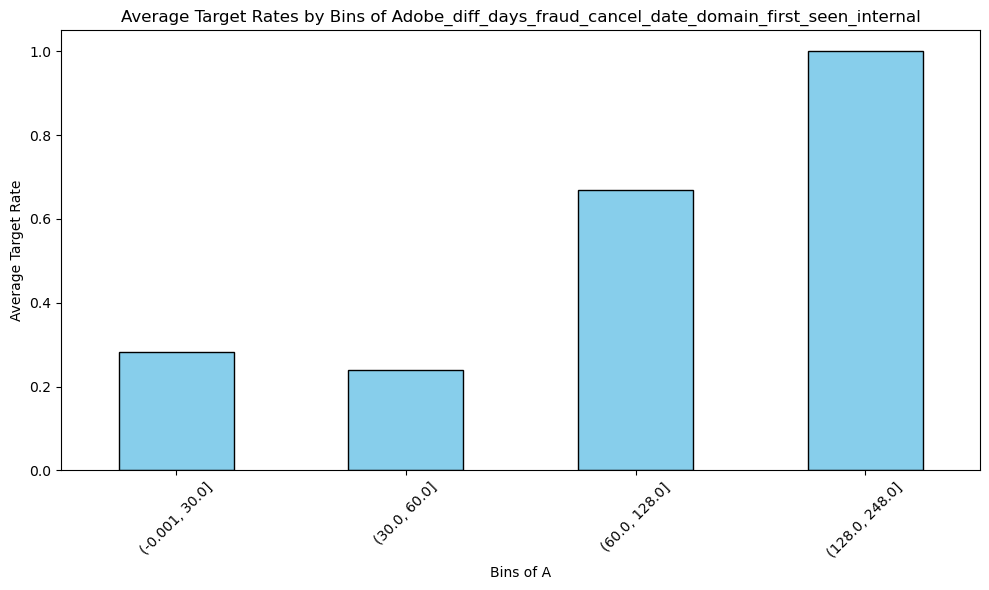

In [1398]:
data['A_bins'] = pd.qcut(data['Adobe_diff_days_fraud_cancel_date_domain_last_seen_internal'], q=4)


# data['A_binned'] = np.where(data['A'] == special_value, 'Special Bin', np.nan)

# # Step 2: Use pd.qcut on the remaining values
# # Mask out the special values for quantile-based binning
# non_special_values = data['A'][data['A'] != special_value]
# # Create 9 quantile-based bins for non-special values
# data.loc[data['A'] != special_value, 'A_binned'] = pd.qcut(non_special_values, q=9)

# # Step 3: Calculate the average target rate for each bin
# average_target_rates = data.groupby('A_binned')['target'].mean()




# Step 2: Group by the bins and calculate the average target rate for each bin
average_target_rates = data.groupby('A_bins')[target].mean()

# Display the results
print("Average target rates by bins of column A:\n", average_target_rates)

# Step 3: Plot the average target rates for each bin
plt.figure(figsize=(10, 6))
average_target_rates.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Bins of A')
plt.ylabel('Average Target Rate')
plt.title('Average Target Rates by Bins of Adobe_diff_days_fraud_cancel_date_domain_first_seen_internal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1308]:
y_train.mean(), y_val.mean(), y_test.mean()

(0.24523217247097845, 0.2557213930348259, 0.252363184079602)

In [1309]:
# Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=4,
# min_child_weight=2, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)

model_xgb1 = XGBClassifier(
    subsample=0.85,                 # Number of classes
    max_depth=4,                 # Maximum tree depth
    colsample_bytree=0.9,                 
#     min_child_weight=2, 
    learning_rate=0.1,           # Learning rate
    n_estimators=100,           # Maximum number of boosting rounds
    eval_metric='auc',      # Evaluation metric for multi-class classification
    seed=42                      # Random seed for reproducibility
)

In [1310]:
# Train the model with early stopping
model_xgb1.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Provide training and validation sets for evaluation
    early_stopping_rounds=30,    # Stop training if validation loss doesn't improve for 10 rounds
    verbose=True                 # Output training progress
)

[0]	validation_0-auc:0.97524	validation_1-auc:0.97704
[1]	validation_0-auc:0.97524	validation_1-auc:0.97704
[2]	validation_0-auc:0.97694	validation_1-auc:0.97865


C:\Users\itsht\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.97710	validation_1-auc:0.97865
[4]	validation_0-auc:0.97717	validation_1-auc:0.97882
[5]	validation_0-auc:0.97735	validation_1-auc:0.97890
[6]	validation_0-auc:0.97943	validation_1-auc:0.98073
[7]	validation_0-auc:0.97942	validation_1-auc:0.98071
[8]	validation_0-auc:0.98146	validation_1-auc:0.98364
[9]	validation_0-auc:0.98200	validation_1-auc:0.98370
[10]	validation_0-auc:0.98216	validation_1-auc:0.98393
[11]	validation_0-auc:0.98243	validation_1-auc:0.98418
[12]	validation_0-auc:0.98246	validation_1-auc:0.98421
[13]	validation_0-auc:0.98249	validation_1-auc:0.98421
[14]	validation_0-auc:0.98262	validation_1-auc:0.98419
[15]	validation_0-auc:0.98249	validation_1-auc:0.98417
[16]	validation_0-auc:0.98250	validation_1-auc:0.98417
[17]	validation_0-auc:0.98269	validation_1-auc:0.98425
[18]	validation_0-auc:0.98289	validation_1-auc:0.98469
[19]	validation_0-auc:0.98301	validation_1-auc:0.98455
[20]	validation_0-auc:0.98301	validation_1-auc:0.98455
[21]	validation_0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1311]:
# Predict on the test set
y_pred_xgb1 = model_xgb1.predict_proba(X_test)[:, 1]

# # Evaluate the accuracy on the test set
# accuracy = accuracy_score(y_test, y_pred_xgb1)
# print("Test set accuracy:", accuracy)

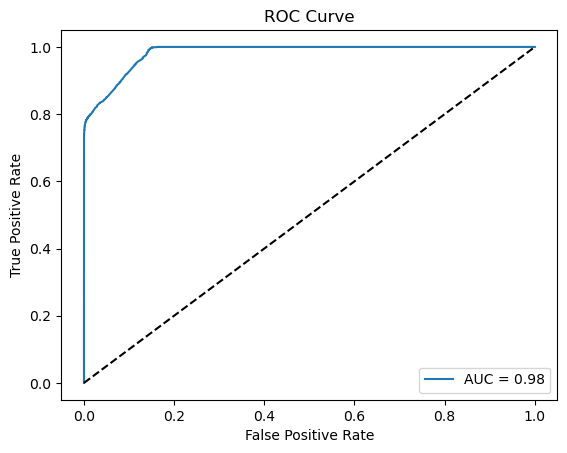

In [1312]:
auc = roc_auc_score(y_test, y_pred_xgb1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb1)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# result_logit1 = model_logit1.fit()

# Print summary with statistical details
# print(result_logit1.summary())

In [1313]:
! pip install bayesian-optimization

In [1314]:
from bayes_opt import BayesianOptimization

In [1315]:
# Define the function to optimize with Bayesian Optimization
def xgb_evaluate(max_depth, learning_rate, n_estimators, subsample, colsample_bytree):
    # Convert hyperparameters from float to int where necessary
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    # Initialize the XGBoost model with current hyperparameters
    model = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False,
        eval_metric='auc',
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions and evaluate accuracy
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    # Return the accuracy as the objective to maximize
    return accuracy

# Define the parameter bounds for Bayesian Optimization
param_bounds = {
    'max_depth': (4, 8),
    'learning_rate': (0.02, 0.2),
    'n_estimators': (50, 300),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

In [1316]:

# Initialize the Bayesian Optimization object
optimizer = BayesianOptimization(
    f=xgb_evaluate,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Perform optimization
optimizer.maximize(init_points=5, n_iter=15)

# Print the best parameters and the best score
print("Best hyperparameters found:", optimizer.max['params'])
print("Best accuracy achieved:", optimizer.max['target'])

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | 0.9353    | 0.7498    | 0.1911    | 6.928     | 199.7     | 0.6624    |
| 2         | 0.9434    | 0.6624    | 0.03046   | 7.465     | 200.3     | 0.8832    |
| 3         | 0.9379    | 0.6082    | 0.1946    | 7.33      | 103.1     | 0.6727    |
| 4         | 0.9425    | 0.6734    | 0.07476   | 6.099     | 158.0     | 0.7165    |
| 5         | 0.944     | 0.8447    | 0.04511   | 5.169     | 141.6     | 0.7824    |
| 6         | 0.9444    | 0.8635    | 0.03361   | 5.175     | 141.6     | 0.8074    |
| 7         | 0.9388    | 0.9252    | 0.1953    | 5.134     | 141.1     | 0.8916    |
| 8         | 0.9386    | 0.8896    | 0.1681    | 5.466     | 141.6     | 0.6672    |
| 9         | 0.9444    | 0.9469    | 0.06361   | 5.042     | 141.7     | 0.9203    |
| 10        | 0.9435    | 0.8161    | 0.03708   | 4.93

In [1317]:
# Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=4,
# min_child_weight=2, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)

model_xgb2 = XGBClassifier(
    colsample_bytree=0.7,                 
    subsample=0.70,
    max_depth=6,                 # Maximum tree depth
    learning_rate=0.05,           # Learning rate
    n_estimators=150,           # Maximum number of boosting rounds
    eval_metric='auc',      # Evaluation metric for multi-class classification
    seed=42                      # Random seed for reproducibility
)

In [1318]:
model_xgb2 = XGBClassifier(
    subsample=0.85,                 # Number of classes
    max_depth=5,                 # Maximum tree depth
    colsample_bytree=0.9,                 
#     min_child_weight=2, 
    learning_rate=0.1,           # Learning rate
    n_estimators=100,           # Maximum number of boosting rounds
    eval_metric='auc',      # Evaluation metric for multi-class classification
    seed=42  )   

In [1319]:
# Train the model with early stopping
model_xgb2.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Provide training and validation sets for evaluation
    early_stopping_rounds=30,    # Stop training if validation loss doesn't improve for 10 rounds
    verbose=True                 # Output training progress
)

[0]	validation_0-auc:0.97749	validation_1-auc:0.97942
[1]	validation_0-auc:0.97801	validation_1-auc:0.98041
[2]	validation_0-auc:0.97819	validation_1-auc:0.98057
[3]	validation_0-auc:0.97807	validation_1-auc:0.98009
[4]	validation_0-auc:0.98112	validation_1-auc:0.98347
[5]	validation_0-auc:0.98152	validation_1-auc:0.98381
[6]	validation_0-auc:0.98156	validation_1-auc:0.98380
[7]	validation_0-auc:0.98158	validation_1-auc:0.98382
[8]	validation_0-auc:0.98155	validation_1-auc:0.98400
[9]	validation_0-auc:0.98201	validation_1-auc:0.98406
[10]	validation_0-auc:0.98188	validation_1-auc:0.98412


C:\Users\itsht\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.98234	validation_1-auc:0.98391
[12]	validation_0-auc:0.98247	validation_1-auc:0.98389
[13]	validation_0-auc:0.98253	validation_1-auc:0.98409
[14]	validation_0-auc:0.98254	validation_1-auc:0.98410
[15]	validation_0-auc:0.98255	validation_1-auc:0.98410
[16]	validation_0-auc:0.98256	validation_1-auc:0.98410
[17]	validation_0-auc:0.98256	validation_1-auc:0.98410
[18]	validation_0-auc:0.98306	validation_1-auc:0.98455
[19]	validation_0-auc:0.98317	validation_1-auc:0.98457
[20]	validation_0-auc:0.98319	validation_1-auc:0.98455
[21]	validation_0-auc:0.98320	validation_1-auc:0.98455
[22]	validation_0-auc:0.98321	validation_1-auc:0.98456
[23]	validation_0-auc:0.98322	validation_1-auc:0.98462
[24]	validation_0-auc:0.98324	validation_1-auc:0.98462
[25]	validation_0-auc:0.98324	validation_1-auc:0.98463
[26]	validation_0-auc:0.98325	validation_1-auc:0.98463
[27]	validation_0-auc:0.98339	validation_1-auc:0.98477
[28]	validation_0-auc:0.98353	validation_1-auc:0.98433
[29]	valid

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1320]:
# Predict on the test set
y_pred_xgb2 = model_xgb2.predict_proba(X_test)[:, 1]

# # Evaluate the accuracy on the test set
# accuracy = accuracy_score(y_test, y_pred_xgb2)
# print("Test set accuracy:", accuracy)

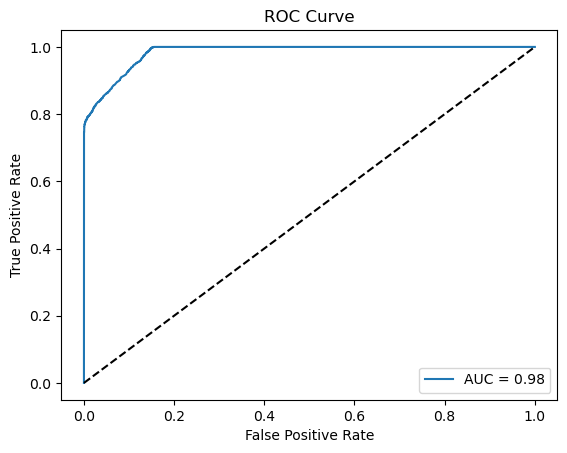

In [1321]:
auc = roc_auc_score(y_test, y_pred_xgb2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb2)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_pred_xgb2 = model_xgb2.predict_proba(X_test)[:, 1]


In [1322]:
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = pd.Series(data.target)


X = df_modeling.loc[df_modeling[target]!=-1].drop(target, axis=1)
y = df_modeling.loc[df_modeling[target]!=-1, target]

# # Load the data (assuming data is available in X and y variables)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


# X_test = df_modeling.loc[df_modeling[target]==-1].drop(target, axis=1)
# y_test = df_modeling.loc[df_modeling[target]==-1, target]


# Split data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



X_OOT = df_modeling.loc[df_modeling[target]==-1].drop(target, axis=1)
y_OOT = df_modeling.loc[df_modeling[target]==-1, target]
# # Split data into training (60%), validation (20%), and test (20%) sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [1323]:
X_train.shape, X_val.shape, X_test.shape

((24120, 34), (8040, 34), (8040, 34))

In [1324]:
# X_no_val.shape, y_no_val.shape

In [1325]:
from sklearn.linear_model import LogisticRegression

AUC: 0.9772579333157816


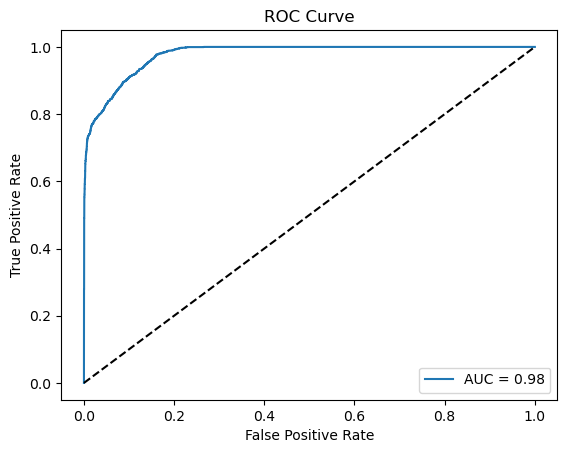

In [1326]:
# Sample data (binary classification)
# Define features and target, and add a constant for intercept
X = df_modeling.loc[df_modeling[target]!=-1].drop(target, axis=1)
y = df_modeling.loc[df_modeling[target]!=-1, target]

# Split data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_no_val = pd.concat([X_train, X_val], axis=0)
y_no_val = pd.concat([y_train, y_val], axis=0)

# X_no_val = sm.add_constant(X_no_val)  # Adds the intercept term
# X_test_const = sm.add_constant(X_test)

# Initialize and fit the Logit model
# model_logit1 = sm.Logit(y_test, X_test)
# model_logit1 = sm.Logit(y_no_val, X_no_val)
# 
model_logit1 = LogisticRegrmodel_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
# model_logit1 = LogisticRegression(penalty='l1', solver='liblinear', C=10= )

model_logit1.fit(X_no_val, y_no_val)

# y_pred_proba_logit1 = result_logit1.predict(X_test_const) 
y_pred_proba_logit1 = model_logit1.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba_logit1)
print("AUC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logit1)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# result_logit1 = model_logit1.fit()

# Print summary with statistical details
# print(result_logit1.summary())

AUC: 0.9324145670509273


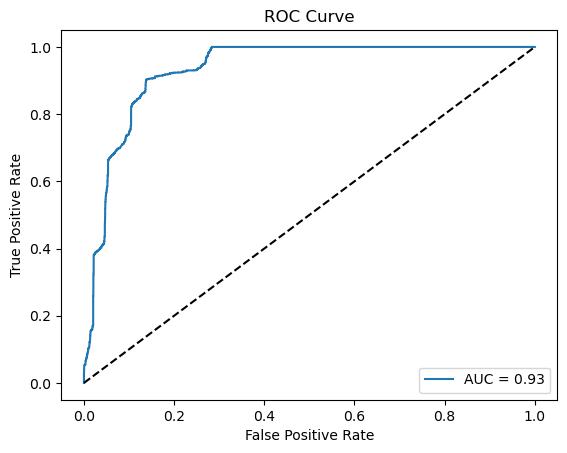

In [1327]:
# Sample data (binary classification)
# Define features and target, and add a constant for intercept
X = df_modeling.loc[df_modeling[target]!=-1].drop(target, axis=1)
y = df_modeling.loc[df_modeling[target]!=-1, target]

# Split data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_no_val = pd.concat([X_train, X_val], axis=0)
y_no_val = pd.concat([y_train, y_val], axis=0)

# X_no_val = sm.add_constant(X_no_val)  # Adds the intercept term
# X_test_const = sm.add_constant(X_test)

# Initialize and fit the Logit model
# model_logit1 = sm.Logit(y_test, X_test)
# model_logit1 = sm.Logit(y_no_val, X_no_val)

# model_logit1 = LogisticRegrmodel_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_logit2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)

model_logit2.fit(X_no_val, y_no_val)

# y_pred_proba_logit1 = result_logit1.predict(X_test_const) 
y_pred_proba_logit2 = model_logit2.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba_logit2)
print("AUC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logit2)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# result_logit1 = model_logit1.fit()

# Print summary with statistical details
# print(result_logit1.summary())

## In Sample Metrics

In [1406]:
X = df_modeling.loc[df_modeling[target]!=-1].drop(target, axis=1)
y = df_modeling.loc[df_modeling[target]!=-1, target]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [1407]:
from sklearn.cluster import KMeans


In [1408]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

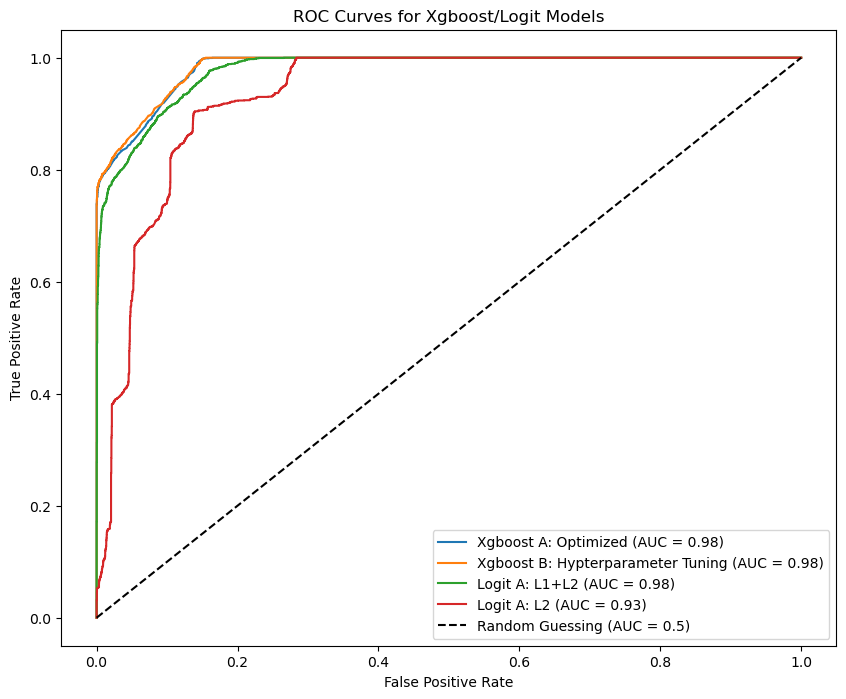

In [1409]:
# Plot multiple AUC curves
plt.figure(figsize=(10, 8))
threshold = 0.5

## Xgboost A
y_pred_xgb1 = model_xgb1.predict_proba(X_test)[:, 1]

auc_xgb1 = roc_auc_score(y_test, y_pred_xgb1)

# Set a threshold for classification (e.g., 0.5)
y_pred = (y_pred_xgb1 >= threshold).astype(int)
precision_xgb1 = precision_score(y_test, y_pred)
recall_xgb1 = recall_score(y_test, y_pred)

# auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb1)
plt.plot(fpr, tpr, label=f"Xgboost A: Optimized (AUC = {auc_xgb1:.2f})")

## Xgboost B
y_pred_xgb2 = model_xgb2.predict_proba(X_test)[:, 1]

auc_xgb2 = roc_auc_score(y_test, y_pred_xgb2)

y_pred = (y_pred_xgb2 >= threshold).astype(int)
precision_xgb2 = precision_score(y_test, y_pred)
# precision_xgb2 = precision_score(y_test, y_pred_xgb2)
recall_xgb2 = recall_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred_xgb2)
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb2)
plt.plot(fpr, tpr, label=f"Xgboost B: Hypterparameter Tuning (AUC = {auc_xgb2:.2f})")

## Logit A
y_pred_proba_logit1 = model_logit1.predict_proba(X_test)[:, 1]

auc_logit1 = roc_auc_score(y_test, y_pred_proba_logit1)
y_pred = (y_pred_proba_logit1 >= threshold).astype(int)
precision_logit1 = precision_score(y_test, y_pred)
recall_logit1 = recall_score(y_test, y_pred)

# auc = roc_auc_score(y_test, y_pred_proba_logit1)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_logit1)
plt.plot(fpr, tpr, label=f"Logit A: L1+L2 (AUC = {auc_logit1:.2f})")

## Logit B
y_pred_proba_logit2 = model_logit2.predict_proba(X_test)[:, 1]

auc_logit2 = roc_auc_score(y_test, y_pred_proba_logit2)
y_pred = (y_pred_proba_logit2 >= threshold).astype(int)
precision_logit2 = precision_score(y_test, y_pred)

recall_logit2 = recall_score(y_test, y_pred)

# auc = roc_auc_score(y_test, y_pred_proba_logit2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_logit2)
plt.plot(fpr, tpr, label=f"Logit A: L2 (AUC = {auc_logit2:.2f})")



# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")

# Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Xgboost/Logit Models")
plt.legend(loc="lower right")
plt.show()

In [1440]:
recall_xgb1, recall_xgb2, recall_logit1, recall_logit2

(0.7811729916214885,
 0.7816658452439625,
 0.8329226219812715,
 0.7171020206998522)

In [1441]:
precision_xgb1, precision_xgb2, precision_logit1, precision_logit2

(0.9808168316831684,
 0.9814356435643564,
 0.8428927680798005,
 0.7289579158316634)

In [1410]:
X_test.shape, y_test.shape

((8040, 34), (8040,))

In [1411]:
y_pred_xgb1

array([0.03096207, 0.00270588, 0.99306935, ..., 0.03096207, 0.69607013,
       0.00270588], dtype=float32)

In [1427]:
# X_test['bin_xgb1'] = pd.qcut(y_pred_xgb1, 10, labels=False, duplicates='drop')
X_test['bin_xgb1'] = pd.cut(y_pred_xgb1, bins=10, labels=False)

X_test[target] = y_test
# Calculate the average target mean in each bin
lift_data_xgb1 = X_test.groupby('bin_xgb1')[target].mean()

In [1428]:
# X_test['bin_xgb2'] = pd.qcut(y_pred_xgb2, 10, labels=False, duplicates='drop')
X_test['bin_xgb2'] = pd.cut(y_pred_xgb2, bins=10, labels=False)

X_test[target] = y_test
# Calculate the average target mean in each bin
lift_data_xgb2 = X_test.groupby('bin_xgb2')[target].mean()

In [1429]:
# lift_data_xgb1, lift_data_xgb2

In [1430]:
# X_test['bin_xgb1'] = pd.qcut(y_pred_xgb1, 10, labels=False, duplicates='drop')
X_test['bin_logit1'] = pd.cut(y_pred_proba_logit1, bins=10, labels=False)

X_test[target] = y_test
# Calculate the average target mean in each bin
lift_data_logit1 = X_test.groupby('bin_logit1')[target].mean()

In [1431]:
# X_test['bin_xgb1'] = pd.qcut(y_pred_xgb1, 10, labels=False, duplicates='drop')
X_test['bin_logit2'] = pd.cut(y_pred_proba_logit2, bins=10, labels=False)

X_test[target] = y_test
# Calculate the average target mean in each bin
lift_data_logit2 = X_test.groupby('bin_logit2')[target].mean()

In [1432]:
type(y_pred_xgb1)

numpy.ndarray

In [1433]:
X_test[target] = y_test

In [1434]:
# # Rank the data to avoid duplicate values
# data = pd.DataFrame()

# data['values'] = y_pred_xgb1
# data['ranked_values'] = rankdata(data['values'], method='average')

# # Use pd.qcut on the ranked data
# data['quantile_bins'] = pd.qcut(data['ranked_values'], q=10, labels=False)

# print(data[['values', 'ranked_values', 'quantile_bins']])

In [1435]:
# X_test['bin_xgb1'] = pd.qcut(np.unique(y_pred_xgb1), 10, duplicates='drop',labels=False)
# # X_test['bin_xgb1'] = pd.qcut(y_pred_xgb1, 3,  duplicates='drop', labels=False)
# # X_test['bin_xgb1'] = custom_qcut(y_pred_xgb1, 20)


# Calculate the average target mean in each bin
# lift_data_xgb1 = X_test.groupby('bin_xgb1')[target].mean()


# X_test['bin_xgb2'] = pd.qcut(np.unique(y_pred_xgb2), 10, duplicates='drop', labels=False)
# X_test['bin_xgb2'] = pd.qcut(y_pred_xgb2, 3,  duplicates='drop', labels=False)
# X_test['bin_xgb2'] = custom_qcut(y_pred_xgb2, 20)

# # Calculate the average target mean in each bin
# lift_data_xgb2 = X_test.groupby('bin_xgb2')[target].mean()


# X_test['bin_logit1'] = pd.qcut(np.unique(y_pred_proba_logit1), 10,  duplicates='drop',labels=False)
# # X_test['bin_logit1'] = pd.qcut(y_pred_proba_logit1, 3,   labels=False)
# # X_test['bin_logit1'] = custom_qcut(y_pred_proba_logit1, 20)
# # 
# # Calculate the average target mean in each bin
# lift_data_logit1 = X_test.groupby('bin_logit1')[target].mean()

# X_test['bin_logit2'] = pd.qcut(np.unique(y_pred_proba_logit2), 10, labels=False)
# # X_test['bin_logit2'] = pd.qcut(y_pred_proba_logit2, 3,  duplicates='drop', labels=False)
# # X_test['bin_logit2'] = custom_qcut(y_pred_proba_logit2, 20)

# # Calculate the average target mean in each bin
# lift_data_logit2 = X_test.groupby('bin_logit2')[target].mean()

In [1436]:
# lift_data_xgb1, lift_data_xgb2, lift_data_logit1, lift_data_logit2

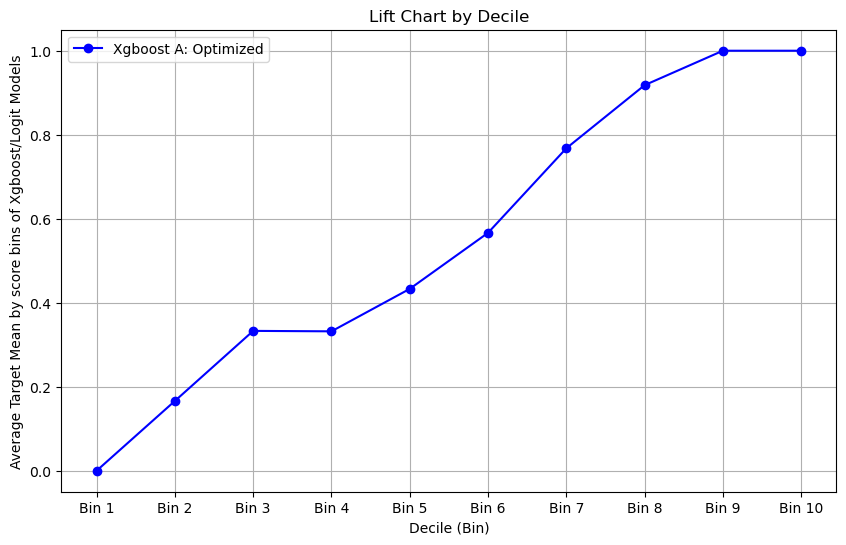

In [1439]:
# # Create 10 bins with equal number of samples in each bin
# X_test['bin'] = pd.qcut(y_pred_xgb1, 10, labels=False)

# # Calculate the average target mean in each bin
# lift_data = X_test.groupby('bin')[target].mean()

# Plot the Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(lift_data_xgb1.index + 1, lift_data_xgb1, marker='o', linestyle='-', color='blue', label='Xgboost A: Optimized')
# plt.plot(lift_data_xgb2.index + 1, lift_data_xgb2, marker='o', linestyle='-', color='red' , label='Xgboost B: Hypterparameter Tuning')
# plt.plot(lift_data_xgb1.index + 1, lift_data_logit1, marker='o', linestyle='-', color='green', label='Logit A: L1+L2')
# plt.plot(lift_data_xgb1.index + 1, lift_data_logit2, marker='o', linestyle='-', color='black', label='Logit A: L2')
plt.legend()

plt.xlabel('Decile (Bin)')
plt.ylabel('Average Target Mean by score bins of Xgboost/Logit Models')
plt.title('Lift Chart by Decile')
plt.xticks(ticks=np.arange(1, 11), labels=[f'Bin {i+1}' for i in range(10)])
plt.grid(True)
plt.show()

In [1469]:
def calculate_psi(baseline, new, bins=20):
    """Calculates PSI (Population Stability Index) between two distributions."""
    # Define the bins
    bin_edges = np.linspace(0, 1, bins + 1)
    baseline_counts, _ = np.histogram(baseline, bins=bin_edges)
    new_counts, _ = np.histogram(new, bins=bin_edges)

    # Convert counts to proportions
    baseline_props = baseline_counts / len(baseline)
    new_props = new_counts / len(new)

    # Avoid division by zero and log(0) by replacing 0s with a very small value
    baseline_props = np.where(baseline_props == 0, 0.0001, baseline_props)
    new_props = np.where(new_props == 0, 0.0001, new_props)

    # Calculate PSI
    psi_values = (baseline_props - new_props) * np.log(baseline_props / new_props)
    psi = np.sum(psi_values)
    return psi

In [1470]:
# def calculate_psi(baseline, new, num_bins=10):
#     """Calculates PSI (Population Stability Index) between two distributions using quantile-based bins."""
#     # Determine quantile-based bin edges from the baseline distribution
#     bin_edges = np.percentile(baseline, np.linspace(0, 100, num_bins + 1))
    
#     # Calculate counts in each bin for both distributions
#     baseline_counts, _ = np.histogram(baseline, bins=bin_edges)
#     new_counts, _ = np.histogram(new, bins=bin_edges)
    
#     # Convert counts to proportions
#     baseline_props = baseline_counts / len(baseline)
#     new_props = new_counts / len(new)
    
#     # Replace zeroes to avoid division or log issues
#     baseline_props = np.where(baseline_props == 0, 0.0001, baseline_props)
#     new_props = np.where(new_props == 0, 0.0001, new_props)
    
#     # Calculate PSI
#     psi_values = (baseline_props - new_props) * np.log(baseline_props / new_props)
#     psi = np.sum(psi_values)
#     return psi

## calculate scores and psi / distributions

In [1471]:
X = df_modeling.loc[df_modeling[target]!=-1].drop(target, axis=1)
y = df_modeling.loc[df_modeling[target]!=-1, target]
X_OOT = df_modeling.loc[df_modeling[target]==-1].drop(target, axis=1)
y_OOT = df_modeling.loc[df_modeling[target]==-1, target]

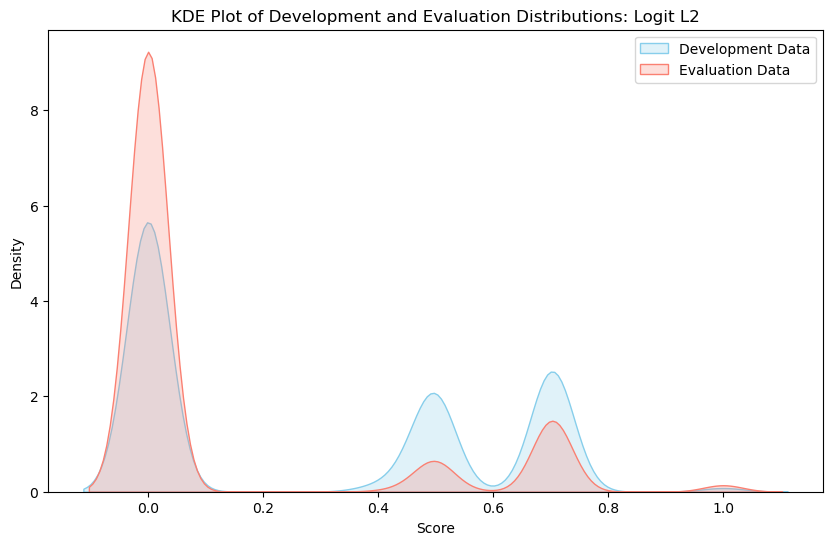

In [1476]:
baseline_scores = model_logit2.predict_proba(X)[:, 1]
new_scores = model_logit2.predict_proba(X_OOT)[:, 1]

# Clip scores to range [0, 1] for probabilities
baseline_scores = np.clip(baseline_scores, 0, 1)
new_scores = np.clip(new_scores, 0, 1)
psi = calculate_psi(baseline_scores, new_scores)

# print(f"PSI between baseline and new scores: {psi:.4f}")
# Plot KDE for both distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(baseline_scores, label="Development Data", color="skyblue", fill=True)
sns.kdeplot(new_scores, label="Evaluation Data", color="salmon", fill=True)
plt.xlabel("Score")
plt.ylabel("Density")
plt.title(f"KDE Plot of Development and Evaluation Distributions: Logit L2")
plt.legend()
plt.show()

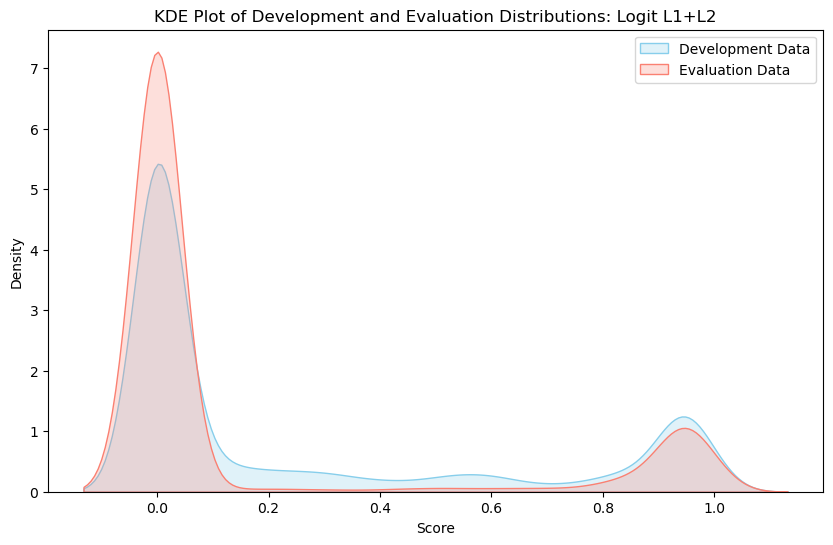

In [1477]:
baseline_scores = model_logit1.predict_proba(X)[:, 1]
new_scores = model_logit1.predict_proba(X_OOT)[:, 1]

# Clip scores to range [0, 1] for probabilities
baseline_scores = np.clip(baseline_scores, 0, 1)
new_scores = np.clip(new_scores, 0, 1)
psi = calculate_psi(baseline_scores, new_scores)

# print(f"PSI between baseline and new scores: {psi:.4f}")
# Plot KDE for both distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(baseline_scores, label="Development Data", color="skyblue", fill=True)
sns.kdeplot(new_scores, label="Evaluation Data", color="salmon", fill=True)
plt.xlabel("Score")
plt.ylabel("Density")
plt.title(f"KDE Plot of Development and Evaluation Distributions: Logit L1+L2")
plt.legend()
plt.show()

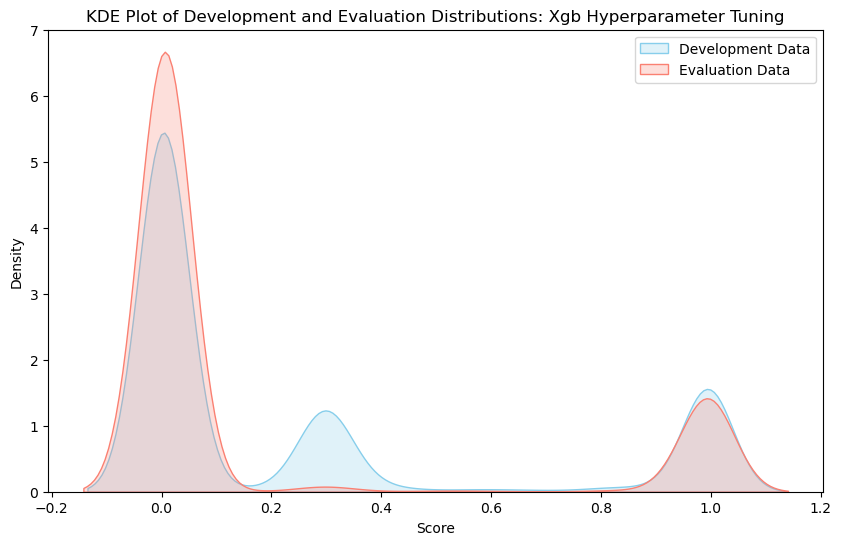

In [1478]:
baseline_scores = model_xgb2.predict_proba(X)[:, 1]
new_scores = model_xgb2.predict_proba(X_OOT)[:, 1]

# Clip scores to range [0, 1] for praobabilities
baseline_scores = np.clip(baseline_scores, 0, 1)
new_scores = np.clip(new_scores, 0, 1)
psi = calculate_psi(baseline_scores, new_scores)

# print(f"PSI between baseline and new scores: {psi:.4f}")
# Plot KDE for both distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(baseline_scores, label="Development Data", color="skyblue", fill=True)
sns.kdeplot(new_scores, label="Evaluation Data", color="salmon", fill=True)
plt.xlabel("Score")
plt.ylabel("Density")
plt.title(f"KDE Plot of Development and Evaluation Distributions: Xgb Hyperparameter Tuning")
plt.legend()
plt.show()

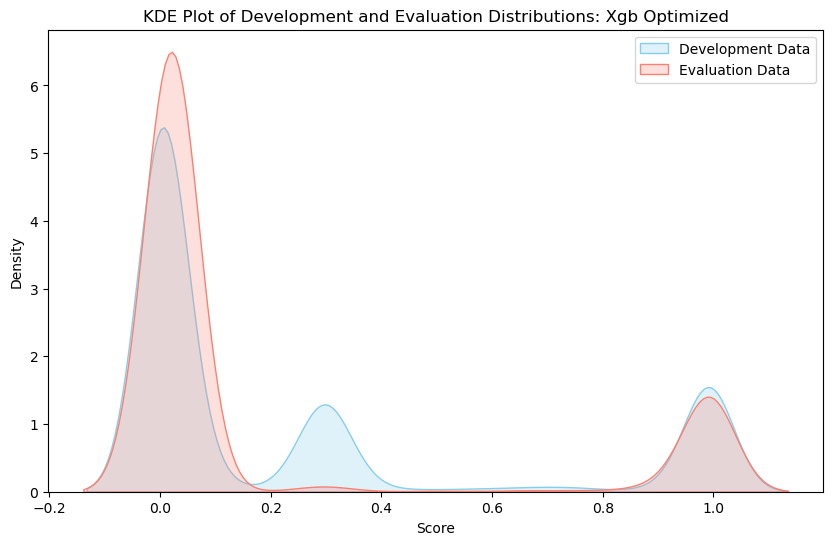

In [1480]:
baseline_scores = model_xgb1.predict_proba(X)[:, 1]
new_scores = model_xgb1.predict_proba(X_OOT)[:, 1]

# Clip scores to range [0, 1] for probabilities
baseline_scores = np.clip(baseline_scores, 0, 1)
new_scores = np.clip(new_scores, 0, 1)
psi = calculate_psi(baseline_scores, new_scores)

# print(f"PSI between baseline and new scores: {psi:.4f}")
# Plot KDE for both distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(baseline_scores, label="Development Data", color="skyblue", fill=True)
sns.kdeplot(new_scores, label="Evaluation Data", color="salmon", fill=True)
plt.xlabel("Score")
plt.ylabel("Density")
plt.title(f"KDE Plot of Development and Evaluation Distributions: Xgb Optimized")
plt.legend()
plt.show()